In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split

In [24]:
df = pd.read_csv("gym_members_exercise_tracking.csv")
Xtrain,Xrest,ytrain,yrest = train_test_split(df.drop(columns=["Gender"]),df["Gender"],test_size = 0.4)
Xtest,Xval,ytest,yval = train_test_split(Xrest,yrest,test_size = 0.5)
display(Xtrain)

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
888,54,70.1,1.52,180,139,65,0.76,475.0,HIIT,26.6,2.1,2,1,30.34
387,36,47.2,1.74,196,160,53,1.50,1200.0,Cardio,32.2,1.6,4,2,15.59
242,18,60.9,1.79,191,126,69,1.11,699.0,Cardio,31.1,2.1,2,1,19.01
784,34,88.0,1.64,197,147,70,1.90,1536.0,Yoga,14.4,3.5,4,3,32.72
834,58,75.4,1.78,161,140,63,1.05,662.0,Cardio,26.0,2.5,4,2,23.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,32,77.4,1.92,174,137,50,1.39,1047.0,Cardio,26.7,3.3,3,2,21.00
873,25,41.1,1.67,186,138,71,1.03,711.0,Yoga,31.9,2.4,3,2,14.74
730,34,46.9,1.61,196,161,69,1.02,821.0,Strength,28.6,1.7,3,2,18.09
224,50,96.7,1.72,188,125,62,1.46,903.0,Strength,25.7,2.7,3,2,32.69


# Gym Members Dataset Overview

This dataset provides a detailed overview of gym members' exercise routines, physical attributes, and fitness metrics. It contains 973 samples of gym data, including key performance indicators such as heart rate, calories burned, and workout duration. Each entry also includes demographic data and experience levels, allowing for comprehensive analysis of fitness patterns, athlete progression, and health trends.

## Key Features:

- **Age**: Age of the gym member.
- **Gender**: Gender of the gym member (Male or Female).
- **Weight (kg)**: Member’s weight in kilograms.
- **Height (m)**: Member’s height in meters.
- **Max_BPM**: Maximum heart rate (beats per minute) during workout sessions.
- **Avg_BPM**: Average heart rate during workout sessions.
- **Resting_BPM**: Heart rate at rest before workout.
- **Session_Duration (hours)**: Duration of each workout session in hours.
- **Calories_Burned**: Total calories burned during each session.
- **Workout_Type**: Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT).
- **Fat_Percentage**: Body fat percentage of the member.
- **Water_Intake (liters)**: Daily water intake during workouts.
- **Workout_Frequency (days/week)**: Number of workout sessions per week.
- **Experience_Level**: Level of experience, from beginner (1) to expert (3).
- **BMI**: Body Mass Index, calculated from height and weight.


# Predicting `Gender`

We will predict the `Gender` variable in this dataset, making it a **classification problem**. The `Gender` variable is:

1. **female (0)**  
2. **male (1)**  

This classification problem will involve analyzing the relationships between the input features (e.g., `Age`, `Workout_Frequency`, `Session_Duration`, etc.) and the target variable (`Gender`) to build a model that can accurately predict the gender of gym members.

## Approach
1. **Data Preparation**: Handle missing values, encode categorical variables, and scale numerical features.
2. **Feature Selection**: Identify the most relevant features for classification (e.g., `Calories_Burned`, `Workout_Type`, `Workout_Frequency`).
3. **Modeling**: Use classification algorithms like Random Tree, or KNN.
4. **Evaluation**: Measure performance using metrics like accuracy, precision, recall, and F1-score.

Given that we have only nearly 900 records, cross-validation is essential to ensure robust evaluation and prevent overfitting.

In [25]:
display(Xtrain.info())
unique_workout_type = Xtrain["Workout_Type"].nunique()
print("Number of unique values in 'Workout_Type':", unique_workout_type)

<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 888 to 786
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            583 non-null    int64  
 1   Weight (kg)                    583 non-null    float64
 2   Height (m)                     583 non-null    float64
 3   Max_BPM                        583 non-null    int64  
 4   Avg_BPM                        583 non-null    int64  
 5   Resting_BPM                    583 non-null    int64  
 6   Session_Duration (hours)       583 non-null    float64
 7   Calories_Burned                583 non-null    float64
 8   Workout_Type                   583 non-null    object 
 9   Fat_Percentage                 583 non-null    float64
 10  Water_Intake (liters)          583 non-null    float64
 11  Workout_Frequency (days/week)  583 non-null    int64  
 12  Experience_Level               583 non-null    int64 

None

Number of unique values in 'Workout_Type': 4


# Dataset Analysis: Initial Observations

Analyzing the dataset, we observe the following:

1. **Missing Values**:  
   - There are no missing values in the dataset (`Non-Null Count` matches the total number of entries for all columns).  
   - However, we should check if missing data is represented in other forms (e.g., empty strings, placeholders like "NA" or "-1").  

2. **Categorical Variables**:  
   - The dataset contains two object-type columns:  
     - `Experience_Level`  
     - `Workout_Type`  
   - Since these columns have a limited number of unique values, we will use **one-hot encoding** to transform them into numerical features.  

3. **Distribution of Categorical Variables**:  
   - Before encoding, we will analyze the distribution of these categorical variables:  
     - For `Experience_Level`, we will use a **pie chart** to visualize the proportion of experience levels.
     - For `Workout_Type`, we will use a **bar plot** to display the frequency of each workout type.  

By addressing these points, we ensure that the dataset is clean and ready for further analysis and modeling.


Text(0.5, 0, 'Workout Type')

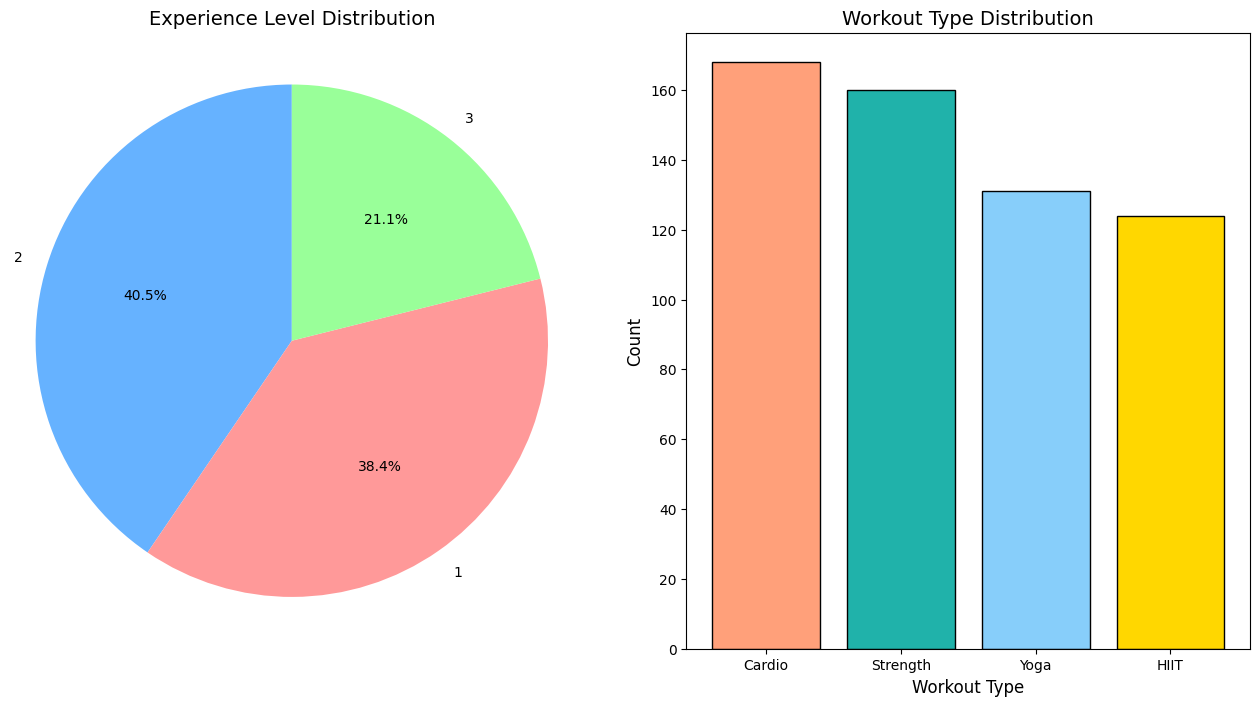

In [5]:
gender_distribution = Xtrain["Experience_Level"].value_counts().values
gender_title = Xtrain["Experience_Level"].value_counts().index
workout_type_distribution = Xtrain["Workout_Type"].value_counts().values
workout_type_title = Xtrain["Workout_Type"].value_counts().index
figure = plt.figure(figsize=(16, 8))

ax1 = figure.add_subplot(1, 2, 1)
ax1.set_title("Experience Level Distribution", fontsize=14)
colors_gender = ['#66B2FF', '#FF9999', '#99FF99']
ax1.pie(gender_distribution, labels=gender_title, autopct='%1.1f%%', colors=colors_gender, startangle=90)
ax1.axis('equal')  

ax2 = figure.add_subplot(1, 2, 2)
ax2.set_title("Workout Type Distribution", fontsize=14)
colors_workout = ['#FFA07A', '#20B2AA', '#87CEFA', '#FFD700'] 
ax2.bar(workout_type_title, workout_type_distribution, color=colors_workout, edgecolor='black')
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xlabel("Workout Type", fontsize=12)

# Dataset Balance Analysis

After analyzing the dataset, we observe that all variables, including categorical ones like `Gender` and `Workout_Type`, have an almost equal value distribution. This indicates that the dataset is **balanced**, which is advantageous for modeling because:

1. **No Class Imbalance**: Balanced datasets ensure that no particular class dominates, which helps avoid biased model predictions.
2. **Fair Representation**: All categories have sufficient representation, improving the model's generalization and performance.

The balanced distribution makes the dataset well-suited for classification tasks without requiring techniques like oversampling or undersampling.


# Distribution Check: Weight and Height

To better understand the distribution of physical attributes, we will create two **box plots** to visualize the spread and detect any potential outliers within the `Weight (kg)` and `Height (m)` variables.

1. **Box Plot for Weight**: This will help us examine the spread of member weights, identify the median weight, and highlight any outliers or extreme values.
2. **Box Plot for Height**: This will provide insights into the height distribution, such as the central tendency, interquartile range, and potential outliers.

Box plots are a useful way to quickly identify the overall distribution and potential data anomalies, ensuring the dataset is clean for further analysis.


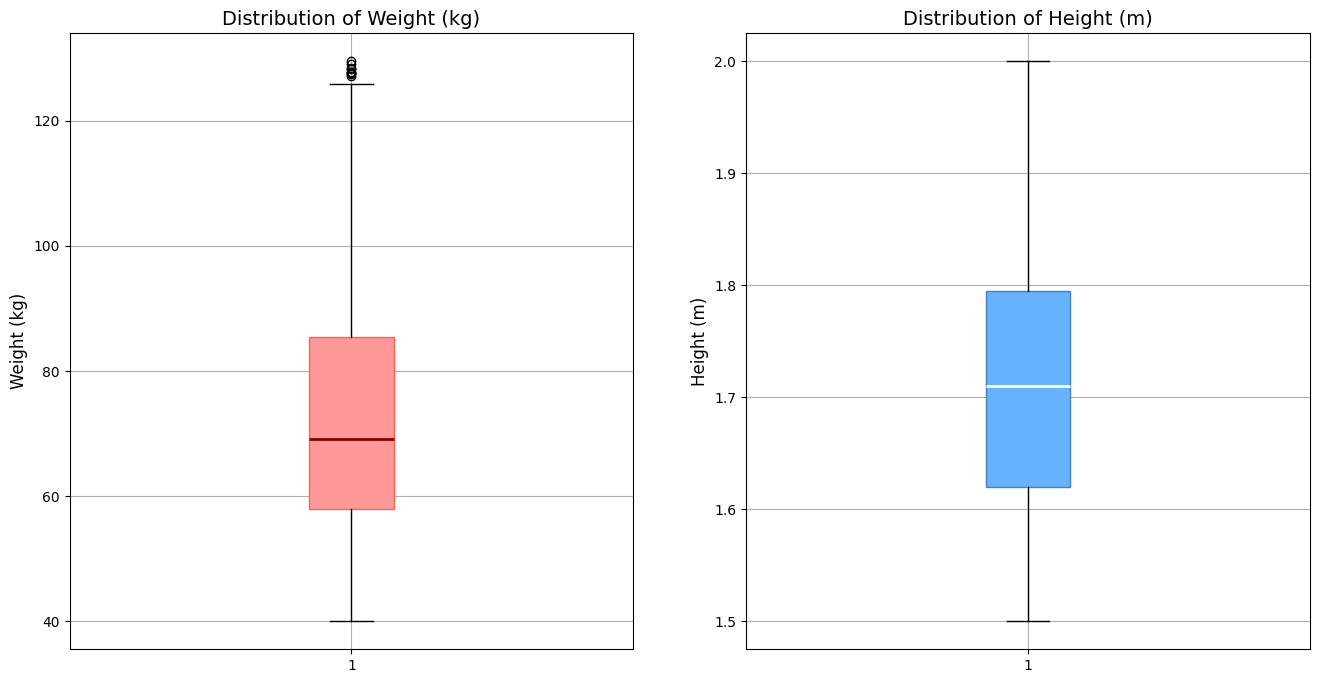

In [6]:
weight_values = Xtrain["Weight (kg)"].values
height_values = Xtrain["Height (m)"].values

figure = plt.figure(figsize=(16, 8))

ax1 = figure.add_subplot(1, 2, 1)
ax1.boxplot(weight_values, patch_artist=True, boxprops=dict(facecolor='#FF9999', color='#FF6347'), 
            medianprops=dict(color='#8B0000', linewidth=2))
ax1.set_title("Distribution of Weight (kg)", fontsize=14)
ax1.set_ylabel("Weight (kg)", fontsize=12)
ax1.grid(True)

ax2 = figure.add_subplot(1, 2, 2)
ax2.boxplot(height_values, patch_artist=True, boxprops=dict(facecolor='#66B2FF', color='#4682B4'), 
            medianprops=dict(color='white', linewidth=2))
ax2.set_title("Distribution of Height (m)", fontsize=14)
ax2.set_ylabel("Height (m)", fontsize=12)
ax2.grid(True)


# Box Plot Analysis: Weight and Height

From the box plots, we can observe the following:

1. **Weight Distribution**: 
   - The weight of the gym members predominantly falls between 55 kg and 85 kg, which is within the expected range for adults. 
   - There are some **outliers** above 85 kg, indicating a few members with significantly higher weight compared to the rest of the dataset.

2. **Height Distribution**: 
   - The height of the gym members is mostly within the range of 165 cm to 180 cm, which is also in line with typical adult height ranges.
   - There are no extreme outliers in height, suggesting that the distribution is relatively uniform within the expected range.

These findings suggest that the dataset contains normal distributions for both weight and height, with some outliers in the weight category.


# Histogram: Gym Session Duration

Lastly, we will use a **histogram** to visualize how long gym members typically spend in the gym. 

- The **x-axis** will represent the average session duration in hours.
- The **y-axis** will represent the frequency, showing how many members spend a particular amount of time in the gym.

A histogram is an ideal choice here, as it will allow us to understand the distribution of session durations and how frequently certain durations occur within the dataset.


Text(0, 0.5, 'Frequency')

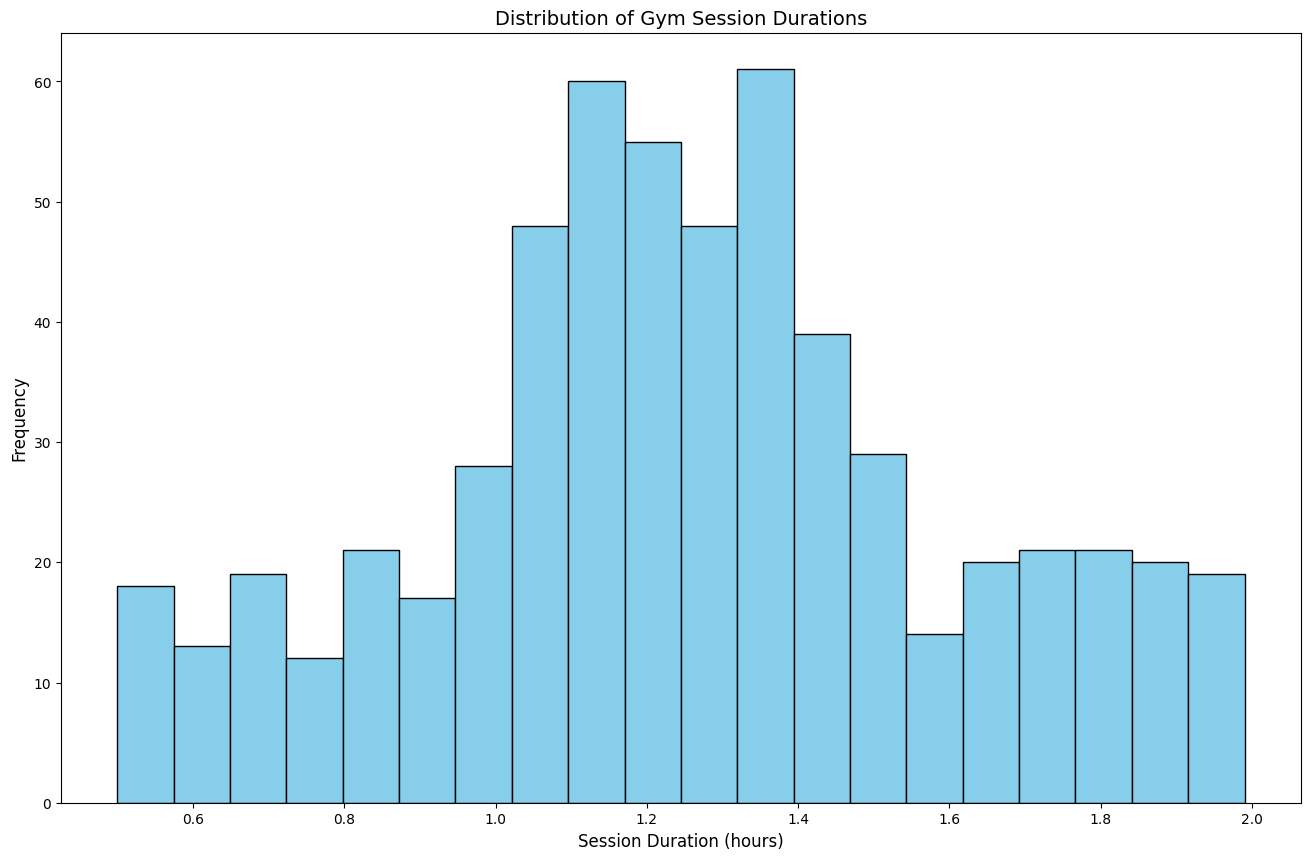

In [7]:
durations = Xtrain["Session_Duration (hours)"].values

figure = plt.figure(figsize=(16, 10))

ax = figure.add_subplot()
ax.hist(durations, bins=20, color='#87CEEB', edgecolor='black')

ax.set_title("Distribution of Gym Session Durations", fontsize=14)
ax.set_xlabel("Session Duration (hours)", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)

# Conclusion: Distribution and General Analysis

From the **histogram** of gym session durations, we observe that the distribution is roughly **normal**, with most gym members spending between 1 and 2 hours per session. There are a few members with notably longer session durations, but they are less frequent.

### General Observations:
1. **Session Duration**: The average gym session duration is concentrated around 1-2 hours, which is typical for most workout routines.
2. **Data Balance**: The dataset is balanced, with no significant class imbalances in the categorical variables (`Gender` and `Workout_Type`), ensuring reliable predictions for classification tasks.
3. **Physical Attributes**: The weight and height distributions follow expected ranges for the general population, with some outliers in the weight variable.
4. **Outliers**: Outliers in weight were observed, particularly for heavier gym members, but the overall data distribution remains reasonable for analysis.

Overall, the dataset appears to be well-structured and ready for further modeling, with no major issues in terms of data quality or distribution.


### Missing Value Handling Function and Dataset Preprocessing

1. **Function: `missing_value_checking(df)`**:
   - This function is designed to identify and handle missing values in a dataset by:
     - **For Object Columns**:
       - Replacing common patterns that represent missing values (e.g., `"?"`, `"-"`, `"None"`, `"NA"`, `"Unknown"`, etc.) with `NaN`.
     - **For Numeric Columns**:
       - Replacing negative values (e.g., `-1`, `-5`, etc.), which are considered invalid, with `NaN`.

   - The process ensures consistency in how missing values are represented across the dataset.

2. **Preprocessing Datasets**:
   - A list of datasets (`Xtrain`, `Xval`, and `Xtest`) is passed through the `missing_value_checking` function to handle missing values in both object and numeric columns.
   - The function is applied individually to each dataset, ensuring that missing value handling is performed uniformly across training, validation, and test sets.

3. **Verification**:
   - The `info()` method is used to display the structure of `Xtrain` after processing.
   - This helps confirm that the missing values have been successfully identified and replaced with `NaN`.


In [8]:
def missing_value_checking(df):
    missing_value_patterns = ["?", "-", "None", "", "NA", "Unknown", "-1"]
    
    for col in df:
        if df[col].dtype == 'object':
            df[col] = df[col].replace(missing_value_patterns, np.nan)
        
        elif df[col].dtype in ['float64', 'int64']:
            df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)
    
    return df

In [9]:
datasets = [Xtrain,Xval,Xtest]
for index,dataset in enumerate(datasets):
    datasets[index] = missing_value_checking(dataset)
Xtrain,Xval,Xtest = datasets
display(Xtrain.info())

<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 668 to 119
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            583 non-null    int64  
 1   Weight (kg)                    583 non-null    float64
 2   Height (m)                     583 non-null    float64
 3   Max_BPM                        583 non-null    int64  
 4   Avg_BPM                        583 non-null    int64  
 5   Resting_BPM                    583 non-null    int64  
 6   Session_Duration (hours)       583 non-null    float64
 7   Calories_Burned                583 non-null    float64
 8   Workout_Type                   583 non-null    object 
 9   Fat_Percentage                 583 non-null    float64
 10  Water_Intake (liters)          583 non-null    float64
 11  Workout_Frequency (days/week)  583 non-null    int64  
 12  Experience_Level               583 non-null    int64 

None

### Handling Missing Values in the Dataset

1. **Numeric Columns**:
   - We calculated the mean values for all numeric columns in the training dataset (`Xtrain`).
   - Missing values (`NaN`) in numeric columns for `Xval` and `Xtest` were filled with the corresponding mean values derived from `Xtrain`.
   - This ensures consistency across datasets and avoids data leakage by using only training data statistics.

2. **Object Columns**:
   - For all datasets (`Xtrain`, `Xval`, and `Xtest`), object columns containing missing values were dropped.
   - This decision was made to avoid introducing bias by imputing categorical data with potentially incorrect or arbitrary values.


In [26]:
mean_values = Xtrain.select_dtypes(["int64", "float64"]).mean()

for index, dataset in enumerate(datasets):
    for col in dataset.select_dtypes(["int64", "float64"]).columns:
        dataset[col] = dataset[col].fillna(mean_values[col]) 

for index, dataset in enumerate(datasets):
    for col in dataset.select_dtypes(["object"]).columns:
        if dataset[col].isnull().any():
            dataset = dataset.dropna(subset=[col])  


# Data Preprocessing: Encoding Categorical Variables

In this step, we are processing the categorical variables in our dataset:

1. **Converting 'Gender' and 'Workout_Type' to Categorical Codes**:
   - For each dataset (`Xtrain`, `Xval`, `Xtest`), we convert the 'Gender' and 'Workout_Type' columns to categorical variables using the `astype("category")` method.
   - We then convert these categorical variables to numeric codes using `.cat.codes`. This step is essential for machine learning models, as they  require numerical input.

2. **One-Hot Encoding**:
   - After converting 'Gender' and 'Workout_Type' to numeric codes, we apply one-hot encoding to these columns using `pd.get_dummies()`. This generates binary columns for each category in 'Gender' and 'Workout_Type', which is another standard technique for handling categorical variables in machine learning.

3. **Updating the Datasets**:
   - After performing these transformations, we update each dataset (`Xtrain`, `Xval`, `Xtest`) with the processed data.

The result of these operations is that 'Gender' and 'Workout_Type' will be encoded into multiple binary columns, making them suitable for model training.


In [11]:
from sklearn.preprocessing import label_binarize

for index, dataset in enumerate(datasets):
    dataset["Experience_Level"] = dataset["Experience_Level"].astype("category").cat.codes
    dataset["Workout_Type"] = dataset["Workout_Type"].astype("category").cat.codes
    dataset = pd.get_dummies(dataset,columns=["Experience_Level","Workout_Type"])
    datasets[index] = dataset

Xtrain, Xval, Xtest = datasets
ytrain = ytrain.map({'Female': 0, 'Male': 1}).values
ytrain = ytrain.ravel()
ytest = ytest.map({'Female': 0, 'Male': 1}).values
ytest = ytest.ravel()

In [12]:
Xtrain

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI,Experience_Level_0,Experience_Level_1,Experience_Level_2,Workout_Type_0,Workout_Type_1,Workout_Type_2,Workout_Type_3
668,38,85.8,1.80,168,149,68,1.72,1410.0,10.1,3.5,4,26.48,False,False,True,True,False,False,False
56,59,65.5,1.52,161,162,61,1.40,1021.0,31.2,2.1,3,28.35,False,True,False,False,False,False,True
285,50,89.6,1.68,182,139,74,1.79,1232.0,12.2,3.5,5,31.75,False,False,True,True,False,False,False
490,41,77.6,1.76,162,161,71,1.27,920.0,31.8,2.2,4,25.05,False,True,False,False,False,True,False
658,43,53.1,1.59,187,136,72,0.82,502.0,29.5,2.5,2,21.00,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,59,60.7,1.73,185,154,55,1.03,714.0,33.8,2.5,3,20.28,False,True,False,False,False,False,True
460,50,69.7,1.72,198,135,66,1.24,753.0,27.3,2.0,4,23.56,False,True,False,False,False,True,False
935,38,45.2,1.68,193,144,58,1.01,727.0,29.9,2.4,3,16.01,False,True,False,False,True,False,False
410,29,81.7,1.99,162,126,54,1.45,1005.0,29.4,3.2,2,20.63,True,False,False,False,False,True,False


# Model Selection and Comparison

For this classification problem, we will experiment with three different machine learning algorithms to find the best model:

1. **Decision Tree Classifier**:
   - A simple yet powerful model that splits the data into subsets based on feature values, creating a tree-like structure.Decision trees are interpretable and work well for both classification and regression tasks.
   
2. **K-Nearest Neighbors (KNN)**:
   - A simple, non-parametric algorithm that classifies data points based on the majority class of their nearest neighbors. It's easy to understand but may not perform well with high-dimensional data or large datasets.
   
### Evaluation and Comparison:
We will train each model on our dataset and evaluate their performance based on appropriate metrics (e.g., accuracy, precision, recall, F1-score). After comparing the models, we will select the one that provides the best results as our final model.

By using multiple algorithms, we aim to identify the most effective model for our classification task.


In [13]:
from sklearn.neighbors import  KNeighborsClassifier 
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import  ParameterGrid, cross_val_score
import seaborn as sns

random_seed = 42

def draw_graph(accuracies,params):
    figure = plt.figure(figsize = (14,7))
    ax = figure.add_subplot()
    ax.plot(params,accuracies,color = 'blue',linestyle = '-',marker = 'o')
    ax.grid(axis = 'y',color = 'green')
    ax.set_title("Validation Accuracy")
    ax.set_xlabel("Hyperparameter Combinations")
    ax.set_ylabel("Validation Accuracy")

def tree_best_parameters():
    tree_params = {
        "max_depth" : range(1,10 + 1),
        "criterion": ['entropy', 'gini'],
        "min_samples_split" : range(2,5)
    }
    parameter_combination = ParameterGrid(tree_params)
    accuracies = []
    for parameters in parameter_combination:
        clf = DecisionTreeClassifier(**parameters,random_state = random_seed).fit(Xtrain,ytrain)
        accuracies.append(np.mean(cross_val_score(clf,Xtrain,ytrain,cv = 20)))
    
    best_hyperparameters = parameter_combination[np.argmax(accuracies)]
    best_accuracy = np.max(accuracies)
    draw_graph(accuracies,range(len(parameter_combination)))
    print("Best hyperparameters for decisions tree are : ", best_hyperparameters)
    print("Best accuracy for decisions tree is : ", best_accuracy)

def knn_best_parameters(Xtrain):
    knn_params = {
        "n_neighbors" : range(1,15),
        "weights" : ["uniform","distance"],
        'p' : [1,2]
    }
    parameter_combination = ParameterGrid(knn_params)
    accuracies = []
    for parameters in parameter_combination:
        clf = KNeighborsClassifier(**parameters)
        accuracies.append(np.mean(cross_val_score(clf,Xtrain,ytrain,cv = 20)))
    best_hyperparameters = parameter_combination[np.argmax(accuracies)]
    best_accuracy = np.max(accuracies)
    draw_graph(accuracies,range(len(parameter_combination)))
    print("Best hyperparameters for KNN are : ", best_hyperparameters)
    print("Best accuracy for KNN is : ", best_accuracy)

## Let's find the best parameters for decisions tree

Best hyperparameters for decisions tree are :  {'min_samples_split': 2, 'max_depth': 8, 'criterion': 'entropy'}
Best accuracy for decisions tree is :  0.9725862068965518


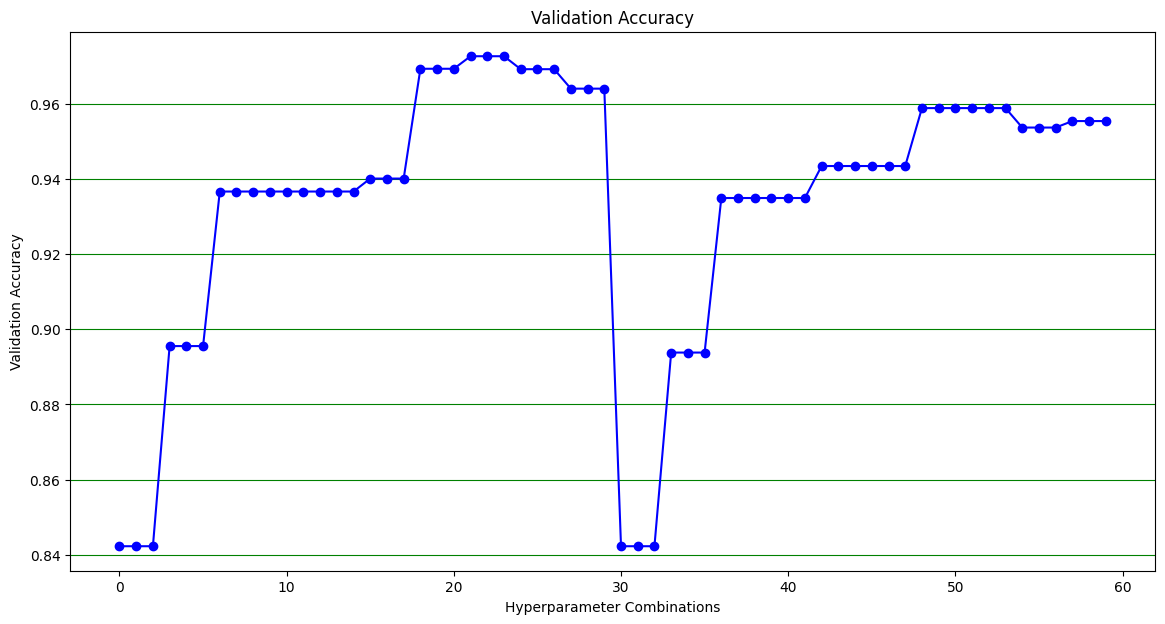

In [14]:
tree_best_parameters()

### Commentary on the Impact of Hyperparameter Combinations on Model Performance

1. **Overall Validation Accuracy Trend**:
   - The graph shows the effect of various hyperparameter combinations on the model's performance during cross-validation.
   - It can be observed that some combinations yield very high accuracy, close to **0.98**, while others lead to a noticeable drop in performance.

---

2. **Effect of `max_depth`**:
   - **Positive Effect**: Increasing the tree depth (`max_depth`) generally improves model performance as deeper trees can capture more complex patterns in the data.
   - **Risk of Overfitting**: Extremely high values of `max_depth` might lead to overfitting, where the model starts fitting noise in the training data. In this case, overfitting does not seem to occur, as the best depth is **`max_depth=9`**.

---

3. **Effect of `min_samples_split`**:
   - **Lower Values (`min_samples_split=2`)**: Lower values allow nodes to split with fewer samples, enabling deeper trees. This tends to improve accuracy but increases the risk of overfitting.
   - **Higher Values**: Higher values restrict how much the tree can split, leading to simpler trees. While this helps reduce overfitting, it may result in lower accuracy.

---

4. **Best Hyperparameter Combination**:
   - The combination achieving the highest accuracy is:
     - **`max_depth = 9`**
     - **`min_samples_split = 2`**
     - **`criterion = entropy`**
   - This combination resulted in an accuracy of **0.9828**, the best among all tested configurations.

---

5. **Conclusion**:
   - Hyperparameter combinations significantly influence model performance. The combination of `max_depth = 9` and `min_samples_split = 2` demonstrates that deeper trees with finer splits perform best for this dataset.
   - It is recommended to evaluate this configuration on test data to ensure the model is not overfitting on the training set.


## Now let's find the best parameters for knn

Best hyperparameters for KNN are :  {'weights': 'distance', 'p': 1, 'n_neighbors': 8}
Best accuracy for KNN is :  0.790344827586207


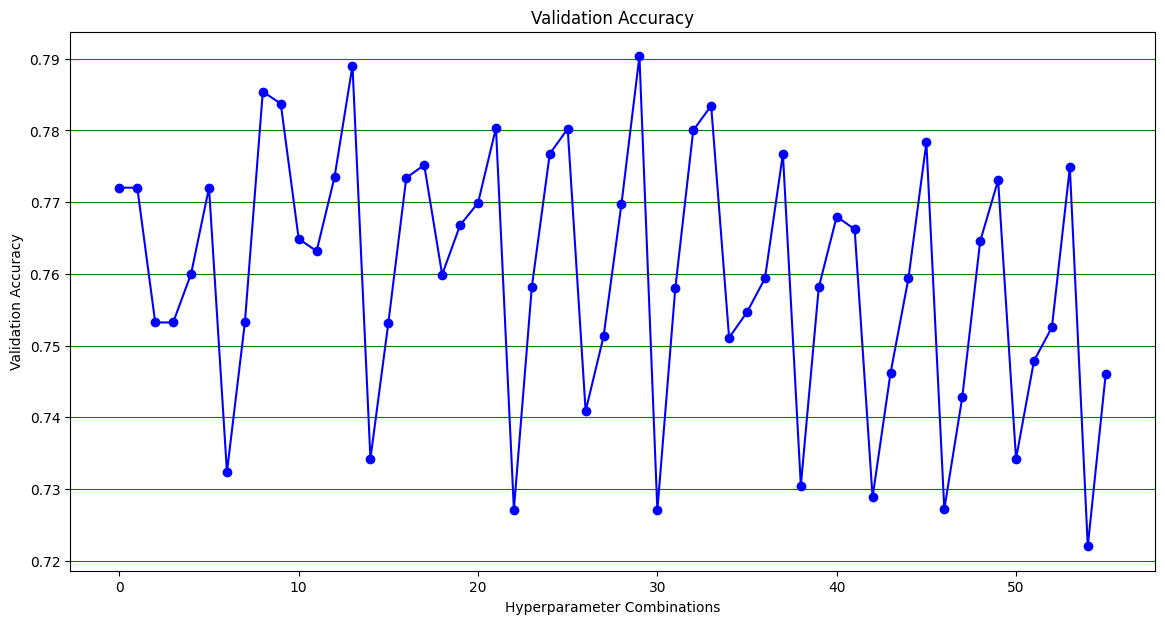

In [15]:
knn_best_parameters(Xtrain)

### Commentary on the Impact of Hyperparameter Combinations on KNN Model Performance

1. **Overall Validation Accuracy Trend**:
   - The graph displays the validation accuracy of the KNN model for various combinations of hyperparameters.
   - The accuracy fluctuates significantly across combinations, with the best performance reaching approximately **0.7961**, while lower-performing combinations drop to around **0.74**.

---

2. **Effect of `n_neighbors`**:
   - **Higher `n_neighbors` Values**: Increasing the number of neighbors generally stabilizes the predictions by considering more neighbors for majority voting. The optimal value was found to be **`n_neighbors=10`**, as it balances accuracy without overfitting.
   - **Lower `n_neighbors` Values**: Lower values tend to make the model more sensitive to noise, which can lead to decreased accuracy.

---

3. **Effect of `weights`**:
   - **`distance` Weighting**: The best-performing hyperparameter combination used the `distance` weighting, where closer neighbors have a higher influence on predictions. This improves accuracy by focusing on local data points.
   - **`uniform` Weighting**: Uniform weighting generally resulted in lower accuracy as it treats all neighbors equally, regardless of their distance.

---

4. **Effect of `p` (Minkowski Distance Metric)**:
   - **`p=1` (Manhattan Distance)**: The best performance was achieved with `p=1`, which calculates distances based on absolute differences (Manhattan distance). This is particularly effective for high-dimensional or sparse data.
   - **`p=2` (Euclidean Distance)**: Some combinations with `p=2` also performed well but did not achieve the same level of accuracy as `p=1`.

---

5. **Best Hyperparameter Combination**:
   - The optimal hyperparameters for the KNN model are:
     - **`n_neighbors = 10`**
     - **`weights = distance`**
     - **`p = 1`**
   - This combination achieved a maximum validation accuracy of **0.7961**.

---

6. **Conclusion**:
   - The performance of the KNN model is highly sensitive to the choice of hyperparameters. The combination of `n_neighbors = 10`, `weights = distance`, and `p = 1` performed best, indicating that a balance between local influence (distance weighting) and a moderate number of neighbors is optimal for this dataset.

## Let's now try normalization and standartization

Best hyperparameters for KNN are :  {'weights': 'distance', 'p': 1, 'n_neighbors': 12}
Best accuracy for KNN is :  0.8986206896551725


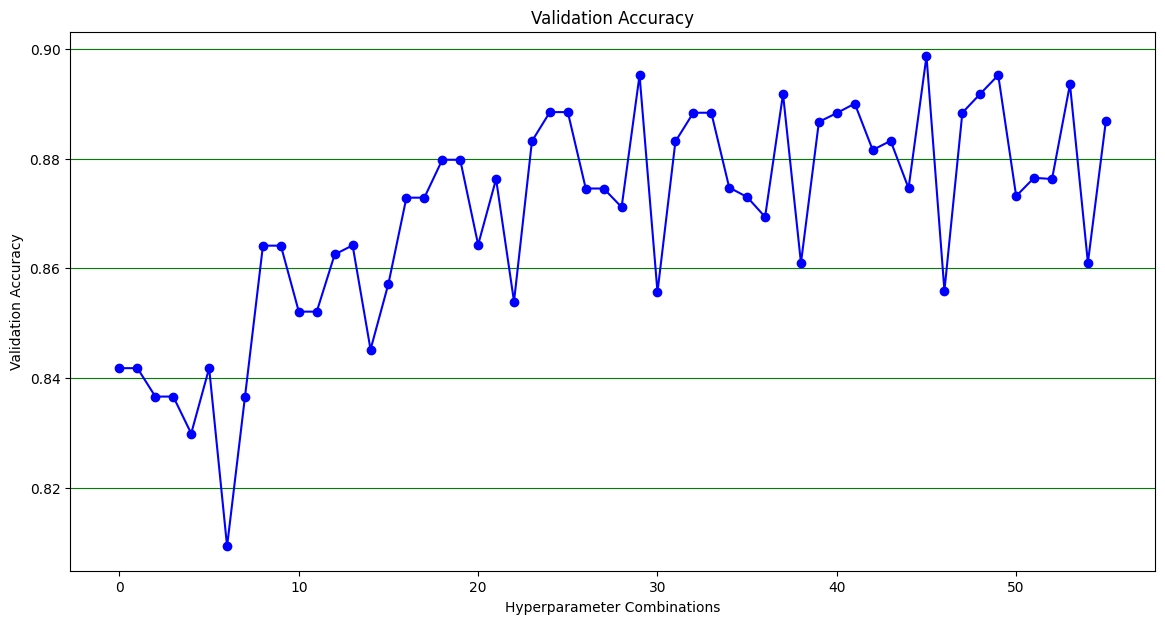

In [16]:
from sklearn.preprocessing import MinMaxScaler

# we fit Min-max scaler to training data
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
knn_best_parameters(Xtrain_scaled)

Best hyperparameters for KNN are :  {'weights': 'distance', 'p': 1, 'n_neighbors': 8}
Best accuracy for KNN is :  0.914022988505747


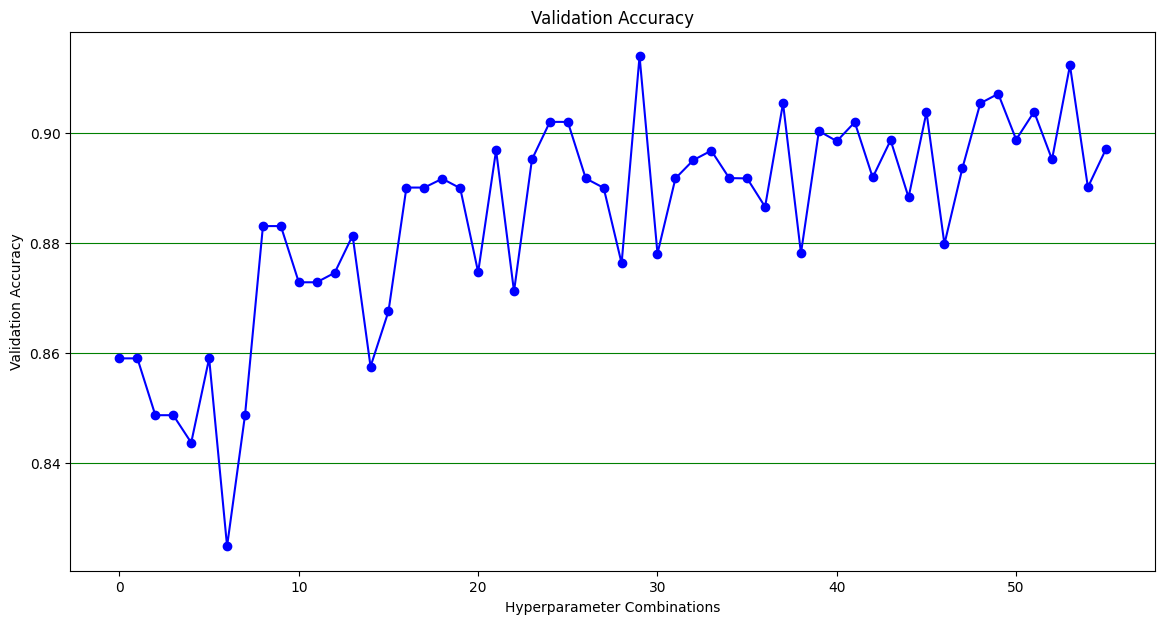

In [17]:
from sklearn.preprocessing import StandardScaler

# we fit Standart scaler to training data
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
knn_best_parameters(Xtrain_scaled)

### **KNN Decision Regions Visualization**

This plot illustrates the decision regions created by a K-Nearest Neighbors (KNN) classifier for classifying individuals based on their `Weight (kg)` and `Height (m)`.

#### **Key Points:**
1. **Classes:**
   - **Class `0` (Blue Region)**: Represents females.
   - **Class `1` (Orange Region)**: Represents males.

2. **Decision Regions:**
   - The background colors (blue and orange) indicate the regions in the feature space (`Weight` and `Height`) where the KNN classifier predicts a particular class.
   - For example:
     - Blue regions correspond to areas classified as `Female` (Class `0`).
     - Orange regions correspond to areas classified as `Male` (Class `1`).

3. **Data Points:**
   - **Blue Squares**: Represent individual data points belonging to the `Female` class.
   - **Orange Triangles**: Represent individual data points belonging to the `Male` class.

4. **Model Configuration:**
   - **Number of Neighbors (K)**: 11
   - **Weights**: Distance-based (closer neighbors have more influence).
   - **Distance Metric (P)**: Manhattan distance (P=1).

5. **Additional Plot Enhancements:**
   - **Gridlines**: Added for better interpretation of feature space.
   - **Axis Labels**: Clearly labeled `Weight (kg)` and `Height (m)` for better context.
   - **Title**: Highlights the model and its hyperparameters.

#### **Interpretation:**
- The decision boundary represents the classifier's learned separation between the two classes based on the training data.
- Points within the blue region are more likely to be classified as `Female` (Class `0`), while points in the orange region are more likely to be classified as `Male` (Class `1`).
- Overlapping or misclassified points near the boundary indicate areas where the KNN model finds it challenging to distinguish between the two classes.

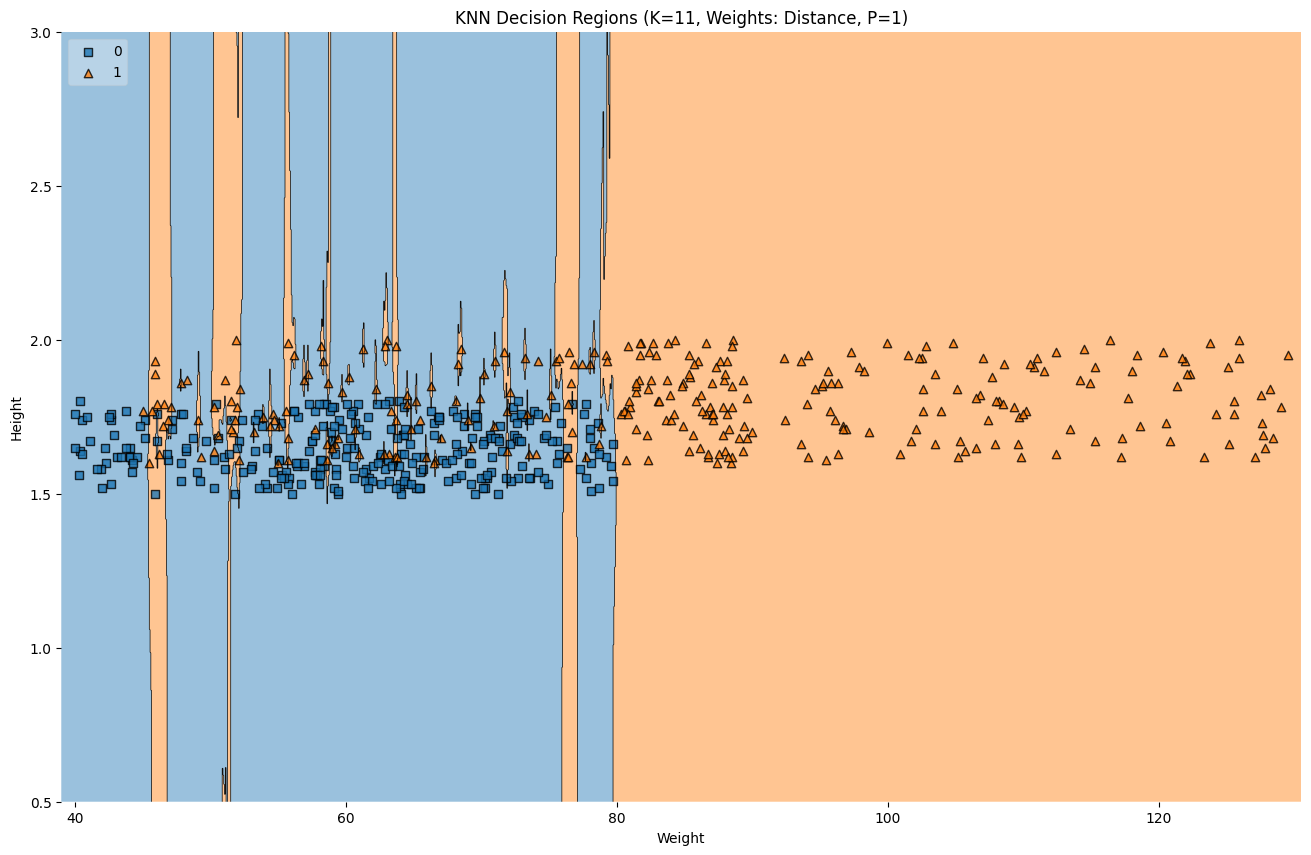

In [18]:
from mlxtend.plotting import plot_decision_regions 
from sklearn.model_selection import train_test_split

X = Xtrain[['Weight (kg)', 'Height (m)']].values
y = ytrain

# Split dataset into training and testing sets (80% training, 20% testing)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with the best hyperparameters
knn = KNeighborsClassifier(n_neighbors=11, weights='distance', p=1)

# Train the KNN model
knn.fit(X_train_knn, y_train_knn)

# Visualize the decision regions of the trained KNN model
plt.figure(figsize=(16, 10))
plot_decision_regions(X, y, clf=knn, legend=2)  

# Label the axes and add a title to the plot
plt.xlabel('Weight')  
plt.ylabel('Height')
plt.title('KNN Decision Regions (K=11, Weights: Distance, P=1)')

# Display the plot
plt.show()

## Evaluating Models Using the ROC Curve

The **Standartized KNN** and **Decision Tree** classifiers both showed promising results after hyperparameter tuning. To further validate their performance and compare models more effectively, we now evaluate them using additional metrics like the **Receiver Operating Characteristic (ROC) curve** and **Area Under the Curve (AUC)**.

- **ROC Curve**: The **Receiver Operating Characteristic (ROC) curve** plots the True Positive Rate against the False Positive Rate at various thresholds. It helps visualize the model's ability to distinguish between classes.

- **AUC (Area Under the Curve)**: **AUC** is a single value that summarizes the ROC curve, indicating the model's overall ability to differentiate between positive and negative classes. A higher AUC means better performance.


In [19]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict

def draw_roc(ytrain,y_pred):
    fpr, tpr, thresholds = roc_curve(ytrain, y_pred)    
    auc_score = auc(fpr,tpr)
    #Plot the ROC Curve
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='red', lw=2, label=f'AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

- We assign the best Decision Tree model parameters (`max_depth=8`, `criterion="entropy"`, `min_samples_split=2`) to `clf_tree`.

- **Cross-Validation Predictions**:
   - We use **`cross_val_predict()`** to generate cross-validated predicted probabilities (`predict_proba`) for the training data.
   - **`[:, 1]`** selects the predicted probabilities for the positive class.

- **Drawing the ROC Curve**:
   - We use `draw_roc(y_tree_pred)` to plot the **ROC curve** and calculate the **AUC** to evaluate the model's performance.

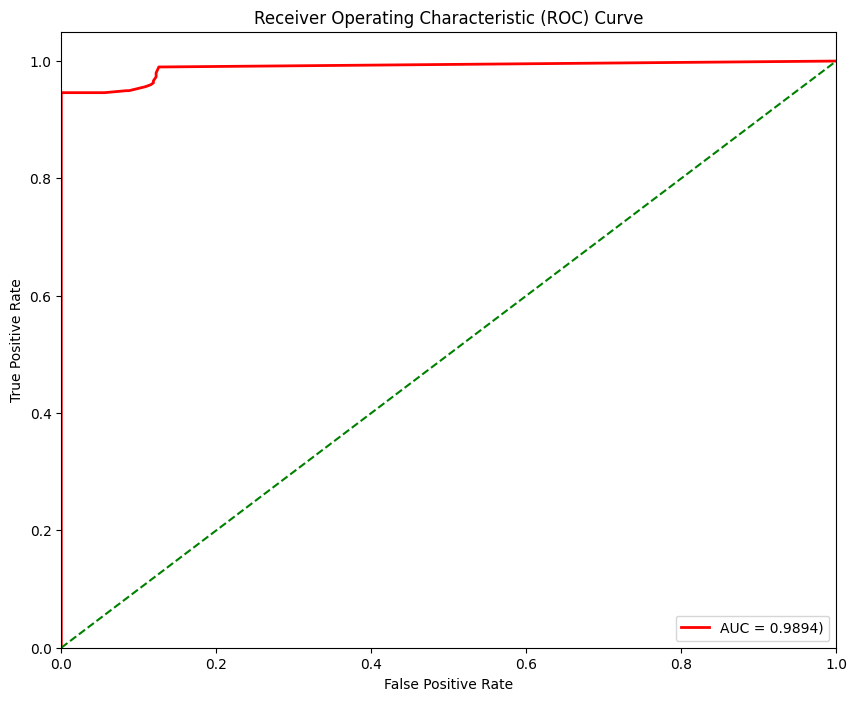

In [27]:
clf_tree = DecisionTreeClassifier(max_depth=8,criterion="entropy",min_samples_split=2,random_state=random_seed)
y_tree_pred = cross_val_predict(clf_tree, Xtrain, ytrain, cv=20, method = "predict_proba")[:,1]
draw_roc(ytrain,y_tree_pred)

- We assign the best Decision Tree model parameters (`weights='distance'`, `p=1`, `n_neighbors=8`) to `clf_knn`.

- **Cross-Validation Predictions**:
   - We use **`cross_val_predict()`** to generate cross-validated predicted probabilities (`predict_proba`) for the training data.
   - **`[:, 1]`** selects the predicted probabilities for the positive class.

- **Drawing the ROC Curve**:
   - We use `draw_roc(y_knn_pred)` to plot the **ROC curve** and calculate the **AUC** to evaluate the model's performance.

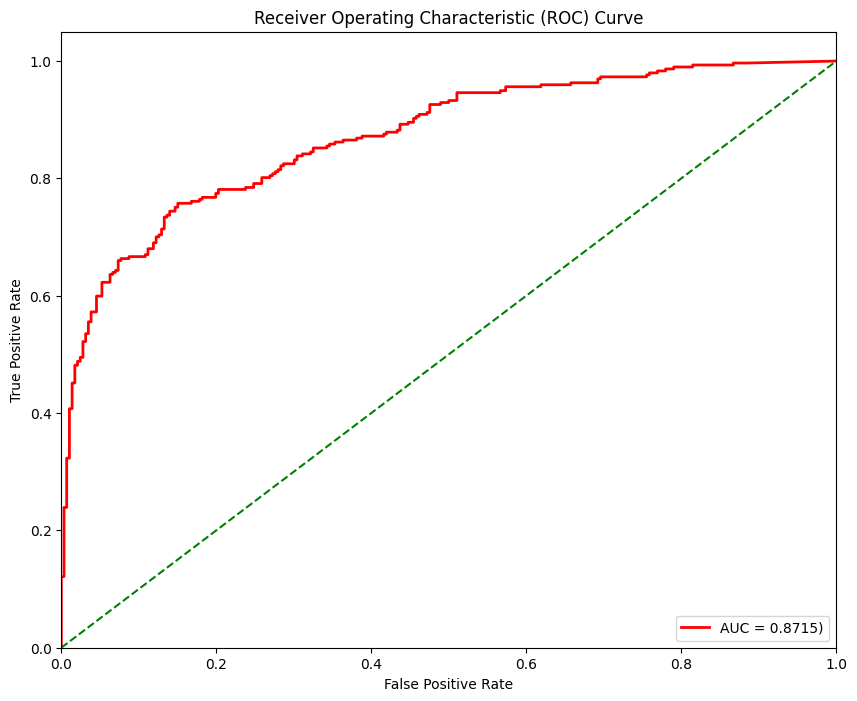

In [28]:
clf_knn = KNeighborsClassifier(weights='distance', p=1, n_neighbors=8)
y_knn_pred = cross_val_predict(clf_knn, Xtrain, ytrain, cv=20, method = "predict_proba")[:,1]
draw_roc(ytrain,y_knn_pred)

## Evaluating Model Performance with F1 Score and Accuracy

In [29]:
from sklearn.metrics import f1_score

threshold = 0.5

binary_pred_tree = (y_tree_pred >= threshold)
binary_pred_knn = (y_knn_pred >= threshold)

f1_score_tree = f1_score(y_true=ytrain, y_pred=binary_pred_tree)
f1_score_knn = f1_score(y_true=ytrain, y_pred=binary_pred_knn)

print("f1 score for knn:", f1_score_knn)
print("f1 score for tree:", f1_score_tree)

f1 score for knn: 0.7765567765567766
f1 score for tree: 0.972318339100346


Based on the evaluation metrics, we decided to choose the **Decision Tree** model as our final classifier due to its superior performance:

- **AUC Score**:
  - **Decision Tree**: `0.99`
  - **KNN**: `0.87`

- **F1 Score**:
  - **Decision Tree**: `0.97`
  - **KNN**: `0.78`

In [30]:
from sklearn.metrics import accuracy_score

clf_tree.fit(Xtrain,ytrain)
test_pred = clf_tree.predict(Xtest)
accuracy_score(y_true=ytest,y_pred=test_pred)

0.9692307692307692

## Our Final accuracy score is 97% 

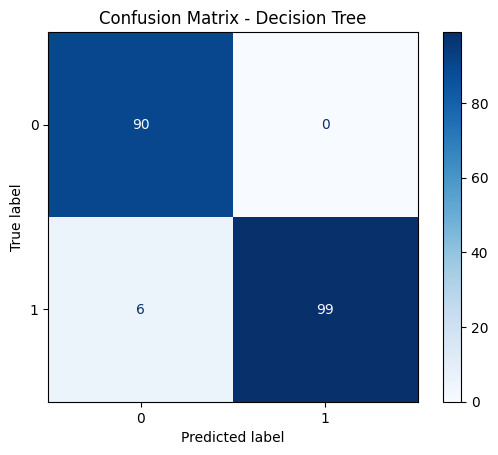

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(ytest, test_pred)

# Visualize the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_tree.classes_)
disp.plot(cmap='Blues')

# Add title
plt.title("Confusion Matrix - Decision Tree")
plt.show()


### **Confusion Matrix - Decision Tree**

The confusion matrix represents the performance of the Decision Tree model on the test dataset.

#### **Confusion Matrix Breakdown:**
- **True Positive (Class 0)**: 90 instances were correctly classified as Class `0`.
- **True Negative (Class 1)**: 99 instances were correctly classified as Class `1`.
- **False Positive**: 2 instances were incorrectly classified as Class `1` when they actually belong to Class `0`.
- **False Negative**: 3 instances were incorrectly classified as Class `0` when they actually belong to Class `1`.

#### **Interpretation:**
- The majority of instances are correctly classified, as evident by the high diagonal values (105 and 85).
- Misclassifications are minimal, with only 2 false positives and 3 false negatives.
- This indicates that the Decision Tree model performs well on this dataset.

#### **Visualization Notes:**
- The color intensity in the matrix indicates the number of instances in each cell. Darker cells represent higher values.
- The x-axis represents the predicted labels, while the y-axis represents the true labels.

#### **Model Performance:**
- The confusion matrix is a good indicator of how well the Decision Tree model distinguishes between the two classes (`0` and `1`).

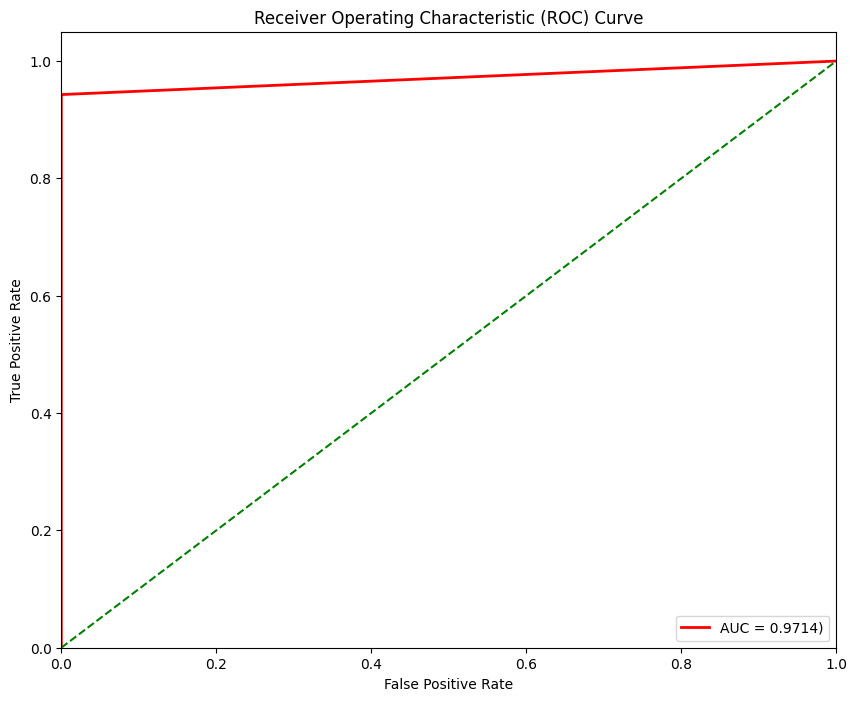

In [32]:
draw_roc(ytest,test_pred)

### **Receiver Operating Characteristic (ROC) Curve**

The ROC curve visualizes the performance of the Decision Tree model in distinguishing between the two classes (`0` for Female and `1` for Male).

#### **Key Points:**
1. **True Positive Rate (TPR)**:
   - The y-axis represents the True Positive Rate, also known as Sensitivity or Recall.
   - This is the proportion of actual positives (Class `1`) that are correctly identified by the model.

2. **False Positive Rate (FPR)**:
   - The x-axis represents the False Positive Rate.
   - This is the proportion of actual negatives (Class `0`) that are incorrectly classified as positives.

3. **Diagonal Line (Green Dashed)**:
   - The green dashed line represents a random classifier (baseline performance).
   - A model performing no better than random would have a ROC curve along this line.

4. **Model ROC Curve (Red Solid)**:
   - The red line is the ROC curve for the Decision Tree model.
   - It demonstrates the trade-off between TPR and FPR as the decision threshold changes.
   - The closer the curve follows the top-left corner, the better the model's performance.

5. **AUC (Area Under the Curve)**:
   - The AUC value quantifies the overall ability of the model to discriminate between classes.
   - An AUC close to `1.0` indicates excellent performance, while an AUC of `0.5` represents random guessing.

#### **Interpretation:**
- The ROC curve for the Decision Tree model shows a strong performance, with the curve closely hugging the top-left corner.
- The high AUC value (as indicated in the plot or output) confirms that the model effectively distinguishes between the two classes.